![](https://img.shields.io/badge/2/4-lightgrey)

# Register cellxgene-census metadata - human

In [1]:
import lamindb as ln
import lnschema_bionty as lb
import cellxgene_census

💡 lamindb instance: laminlabs/cellxgene-census


In [2]:
lb.settings.organism = "human"
human = lb.settings.organism.scientific_name
rna = "RNA"

In [3]:
ln.context.track()

💡 notebook imports: cellxgene-census==1.3.0 lamin_utils==0.11.3 lamindb==0.55.0 lnschema_bionty==0.31.1
💡 Transform(id='wJfHkfyRK0Gpz8', name='Register cellxgene-census metadata - human', short_name='meta-human', version='0', type='notebook', reference='https://github.com/laminlabs/cellxgene-census-lamin/blob/2553c2690909976efe380ca96d9e4d6b9a6c6749/docs/notebooks/human-meta.ipynb', reference_type='github', updated_at=2023-10-05 14:05:13, created_by_id='kmvZDIX9')
💡 Run(id='qfYt3enkIXsEyPaSbVlJ', run_at=2023-10-05 14:15:57, transform_id='wJfHkfyRK0Gpz8', created_by_id='kmvZDIX9')


In [4]:
census = cellxgene_census.open_soma(census_version="2023-07-25")

The "stable" release is currently 2023-07-25. Specify 'census_version="2023-07-25"' in future calls to open_soma() to ensure data consistency.
2023-10-05 16:15:58,271:INFO - The "stable" release is currently 2023-07-25. Specify 'census_version="2023-07-25"' in future calls to open_soma() to ensure data consistency.


In [5]:
census_data = census["census_data"][human]

## Validate and register genes

Gene metadata:

In [6]:
census_data.ms[rna].var.keys()

('soma_joinid', 'feature_id', 'feature_name', 'feature_length')

In [7]:
gene_metadata = census_data.ms[rna].var.read().concat().to_pandas()

In [8]:
gene_metadata.shape

(60664, 4)

In [9]:
gene_metadata.head()

,soma_joinid,feature_id,feature_name,feature_length
0,0,ENSG00000121410,A1BG,3999
1,1,ENSG00000268895,A1BG-AS1,3374
2,2,ENSG00000148584,A1CF,9603
3,3,ENSG00000175899,A2M,6318
4,4,ENSG00000245105,A2M-AS1,2948


In [10]:
lb.Gene.inspect(gene_metadata["feature_id"], field=lb.Gene.ensembl_gene_id);

❗ 60664 terms (100.00%) are not validated for ensembl_gene_id: ENSG00000121410, ENSG00000268895, ENSG00000148584, ENSG00000175899, ENSG00000245105, ENSG00000166535, ENSG00000256661, ENSG00000184389, ENSG00000128274, ENSG00000118017, ENSG00000094914, ENSG00000081760, ENSG00000114771, ENSG00000197953, ENSG00000242908, ENSG00000188984, ENSG00000204518, ENSG00000109576, ENSG00000158122, ENSG00000103591, ...
   detected 60517 Gene terms in Bionty for ensembl_gene_id: 'ENSG00000221703', 'ENSG00000227593', 'ENSG00000207077', 'ENSG00000222658', 'ENSG00000272121', 'ENSG00000109272', 'ENSG00000264148', 'ENSG00000260532', 'ENSG00000286126', 'ENSG00000224671', 'ENSG00000053371', 'ENSG00000105364', 'ENSG00000263206', 'ENSG00000261765', 'ENSG00000251946', 'ENSG00000250928', 'ENSG00000258586', 'ENSG00000198815', 'ENSG00000252725', 'ENSG00000272148', ...
→  add records from Bionty to your Gene registry via .from_values()
   couldn't validate 147 terms: 'ENSG00000137808', 'ENSG00000271409', 'ENSG000002

In [11]:
# register genes from bionty
gene_records = lb.Gene.from_values(
    gene_metadata["feature_id"], field=lb.Gene.ensembl_gene_id
)
ln.save(gene_records)

validated = lb.Gene.validate(gene_metadata["feature_id"], field=lb.Gene.ensembl_gene_id)
# register legacy genes manually
gene_metadata_id = gene_metadata.set_index("feature_id")
records = []
for gene_id in gene_metadata["feature_id"][~validated]:
    records.append(
        lb.Gene(
            ensembl_gene_id=gene_id, symbol=gene_metadata_id.loc[gene_id].feature_name
        )
    )
ln.save(records)

❗ did not create Gene records for 147 non-validated ensembl_gene_ids: 'ENSG00000112096', 'ENSG00000137808', 'ENSG00000161149', 'ENSG00000182230', 'ENSG00000203812', 'ENSG00000204092', 'ENSG00000205485', 'ENSG00000212951', 'ENSG00000215271', 'ENSG00000221995', 'ENSG00000224739', 'ENSG00000224745', 'ENSG00000225178', 'ENSG00000225932', 'ENSG00000226377', 'ENSG00000226380', 'ENSG00000226403', 'ENSG00000227021', 'ENSG00000227220', 'ENSG00000227902', ...
❗ 147 terms (0.20%) are not validated for ensembl_gene_id: ENSG00000285162, ENSG00000276814, ENSG00000282080, ENSG00000237513, ENSG00000239467, ENSG00000236886, ENSG00000273576, ENSG00000256427, ENSG00000272040, ENSG00000278198, ENSG00000273496, ENSG00000279765, ENSG00000224739, ENSG00000226380, ENSG00000285106, ENSG00000272551, ENSG00000237133, ENSG00000272267, ENSG00000271870, ENSG00000227902, ...


In [17]:
gene_records = lb.Gene.from_values(
    gene_metadata["feature_id"], field=lb.Gene.ensembl_gene_id
)

feature_set = ln.FeatureSet(
    features=gene_records,
    name="all mouse genes in cellxgene-census RNA measurement",
)
feature_set.save()

## Observational metadata

All available metadata columns:

In [14]:
census_data.obs.keys()

('soma_joinid',
 'dataset_id',
 'assay',
 'assay_ontology_term_id',
 'cell_type',
 'cell_type_ontology_term_id',
 'development_stage',
 'development_stage_ontology_term_id',
 'disease',
 'disease_ontology_term_id',
 'donor_id',
 'is_primary_data',
 'self_reported_ethnicity',
 'self_reported_ethnicity_ontology_term_id',
 'sex',
 'sex_ontology_term_id',
 'suspension_type',
 'tissue',
 'tissue_ontology_term_id',
 'tissue_general',
 'tissue_general_ontology_term_id')

### Register features

Register `obs` column names as features:

In [18]:
features = []
for col in census_data.obs.keys():
    if col == "soma_joinid":
        type = "int"
    elif col == "is_primary_data":
        type = "bool"
    else:
        type = "category"
    features.append(ln.Feature(name=col, type=type))

ln.save(features)

Register a feature set for the obs columns:

In [19]:
obs_featureset = ln.FeatureSet(features=features, name="census_data.obs.keys")
obs_featureset.save()

In [22]:
obs_featureset

FeatureSet(id='J3X9iz6JBANjvgtZic0u', name='census_data.obs.keys', n=21, registry='core.Feature', hash='TvKFSa5acE9Qre4VRMDS', updated_at=2023-10-05 14:31:03, modality_id='FyZj4S3Z', created_by_id='kmvZDIX9')

In [25]:
features = ln.Feature.lookup(return_field=ln.Feature.name)
features_records = ln.Feature.lookup()

### Validate and register ontologies

Fetch all terms used in census for each ontology:

In [9]:
dfs = {}

for cols in [
    (features.assay, features.assay_ontology_term_id),
    (features.cell_type, features.cell_type_ontology_term_id),
    (features.development_stage, features.development_stage_ontology_term_id),
    (features.disease, features.disease_ontology_term_id),
    (
        features.self_reported_ethnicity,
        features.self_reported_ethnicity_ontology_term_id,
    ),
    (features.sex, features.sex_ontology_term_id),
    (features.tissue, features.tissue_ontology_term_id),
    (features.tissue_general, features.tissue_general_ontology_term_id),
]:
    dfs[cols[0]] = (
        census_data.obs.read(column_names=[cols[0], cols[1]])
        .concat()
        .to_pandas()
        .drop_duplicates()
    )

In [18]:
dfs[features.assay].head()

,assay,assay_ontology_term_id
0,10x 3' v3,EFO:0009922
31497,10x 3' v2,EFO:0009899
384893,10x 5' transcription profiling,EFO:0030004
655748,10x 5' v2,EFO:0009900
829647,Smart-seq2,EFO:0008931


In [11]:
def register_ontology(orm, name: str, parents: bool = True, **kwargs):
    from lamin_utils import logger

    df = dfs[name]
    records = orm.from_values(
        df[f"{name}_ontology_term_id"], field=orm.ontology_id, **kwargs
    )
    for record in records:
        census_name = df[df[f"{name}_ontology_term_id"] == record.ontology_id][
            name
        ].tolist()[0]
        if census_name != record.name:
            logger.warning(
                f"census name '{census_name}' doesn't match ontology name"
                f" '{record.name}', adding census name as abbr\n"
            )
            record.set_abbr(census_name)
    name_with_schema = orm.__get_name_with_schema__()
    feature = ln.Feature.filter(name=name).one()
    feature.registries = name_with_schema
    feature.save()
    feature = ln.Feature.filter(name=f"{name}_ontology_term_id").one()
    feature.registries = name_with_schema
    feature.save()
    ln.save(records, parents=parents)

In [20]:
register_ontology(lb.ExperimentalFactor, features.assay)

❗ now recursing through parents: this only happens once, but is much slower than bulk saving


In [22]:
register_ontology(lb.CellType, features.cell_type)

In [13]:
register_ontology(lb.DevelopmentalStage, features.development_stage)

❗ did not create DevelopmentalStage record for 1 non-validated ontology_id: 'unknown'

❗ now recursing through parents: this only happens once, but is much slower than bulk saving


In [34]:
lb.DevelopmentalStage(name="unknown").save()

In [24]:
register_ontology(lb.Disease, features.disease)

❗ did not create Disease record for 1 non-validated ontology_id: 'PATO:0000461'
❗ now recursing through parents: this only happens once, but is much slower than bulk saving


'PATO:0000461' is a term for "normal" which can be typed with `Phenotype`:

In [23]:
pato = lb.BiontySource.filter(source="pato").one()
normal_record = lb.Phenotype.from_bionty(ontology_id="PATO:0000461", bionty_source=pato)
lb.Disease(
    name=normal_record.name,
    ontology_id=normal_record.ontology_id,
    description=normal_record.description,
    bionty_source_id=normal_record.bionty_source_id,
).save()

❗ records with similar names exist! did you mean to load one of them?


,id,synonyms,__ratio__
name,,,
adenocarcinoma,O8eOaxZg,adenocarcinoma NOS (morphologic abnormality)|a...,90.0
clear cell adenocarcinoma,LSTAbvaz,water-clear cell adenocarcinoma (morphologic a...,90.0
malignant mixed neoplasm,rHqZ9FK3,malignant mixed cancer|malignant mixed tumor|m...,90.0
pleomorphic carcinoma,qQPlOaeZ,pleomorphic carcinoma (morphologic abnormality...,90.0
sarcomatoid carcinoma,gaS0O3ee,spindle cell carcinoma (morphologic abnormalit...,90.0


In [26]:
register_ontology(lb.Ethnicity, features.self_reported_ethnicity)

❗ did not create Ethnicity records for 2 non-validated ontology_ids: 'multiethnic', 'unknown'
❗ census name 'Greater Middle Eastern  (Middle Eastern, North African or Persian)' doesn't match ontology name 'Greater Middle Eastern  (Middle Eastern or North African or Persian)', adding census name as a synonym

❗ now recursing through parents: this only happens once, but is much slower than bulk saving


Let's manually add two terms to the Ethnicity registry:

In [27]:
lb.Ethnicity(name="multiethnic").save()
lb.Ethnicity(name="unknown").save()

In [28]:
register_ontology(lb.Phenotype, features.sex, parents=False, bionty_source=pato)

❗ did not create Phenotype record for 1 non-validated ontology_id: 'unknown'


In [29]:
lb.Phenotype(name="unknown").save()

In [30]:
register_ontology(lb.Tissue, features.tissue_general)

❗ now recursing through parents: this only happens once, but is much slower than bulk saving


In [31]:
register_ontology(lb.Tissue, features.tissue)

❗ now recursing through parents: this only happens once, but is much slower than bulk saving


### Validate and register non-ontological metadata

"donor_id" and "suspension_type" are two fields without public ontologies, let's register them using "ULabel":

In [35]:
features_records.donor_id.registries = ln.ULabel.__get_name_with_schema__()
features_records.donor_id.save()
features_records.suspension_type.registries = ln.ULabel.__get_name_with_schema__()
features_records.suspension_type.save()

In [26]:
donor_ids = (
    census_data.obs.read(column_names=[features.donor_id])
    .concat()
    .to_pandas()
    .drop_duplicates()
)

In [ ]:
records = []
for donor_id in donor_ids[features.donor_id].unique():
    record = ln.ULabel(
        name=donor_id, description=f"human {features.donor_id}: {donor_id}"
    )
    records.append(record)

ln.save(records)

Construct a parent "is_donor" to group these ulabels:

In [48]:
is_donor = ln.ULabel(name="is_donor", description="parent of donor ids")
is_donor.save()
is_donor.children.set(records)

We do the same for "suspension_type":

In [49]:
suspension_types = (
    census_data.obs.read(column_names=[features.suspension_type])
    .concat()
    .to_pandas()
    .drop_duplicates()
)

records = []
for suspension_type in suspension_types[features.suspension_type].unique():
    record = ln.ULabel(
        name=suspension_type,
        description=f"{features.suspension_type}: {suspension_type}",
    )
    records.append(record)

ln.save(records)

is_suspension_type = ln.ULabel(
    name="is_suspension_type", description="parent of suspension types"
)
is_suspension_type.save()
is_suspension_type.children.set(records)

❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
Emphysema Cell Atlas,EpGwiqdy,90.0
Human breast cell atlas,sxRX6DQT,90.0
Cells of the adult human heart,brx2R5s8,90.0


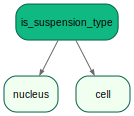

In [50]:
is_suspension_type.view_parents(with_children=True)

In [51]:
census.close()